<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L13-2_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%9B%88%EB%A0%A8%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **인공신경망 구성하기**

In [11]:
from keras.models import Sequential
from keras. layers import Dense

model = Sequential()
model.add(Dense(units = 16, activation = "relu", input_shape = (10, )))
model.add(Dense(units = 16, activation = "relu") )
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **이진 분류기 훈련하기**

In [12]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

model = Sequential()
model.add(Dense(units=16, activation="relu", input_shape=(number_of_features, )))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(features_train,
                    target_train,
                    epochs=15,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test, target_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7387 - loss: 0.5284 - val_accuracy: 0.8582 - val_loss: 0.3379
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8669 - loss: 0.3219 - val_accuracy: 0.8620 - val_loss: 0.3259
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8745 - loss: 0.3036 - val_accuracy: 0.8598 - val_loss: 0.3291
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8761 - loss: 0.2994 - val_accuracy: 0.8612 - val_loss: 0.3238
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8792 - loss: 0.2909 - val_accuracy: 0.8610 - val_loss: 0.3228
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8872 - loss: 0.2734 - val_accuracy: 0.8591 - val_loss: 0.3269
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8923 - loss: 0.2655 - val_accuracy: 0.8587 - val_loss: 0.3293
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8953 - loss: 0.2556 - val_accuracy: 0.

In [41]:
number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb. load_data(num_words = number_of_features)

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = "binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode = "binary")

print(features_train.shape)
print(features_test.shape)

(25000, 1000)
(25000, 1000)


In [42]:
data_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65]

In [43]:
features_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [44]:
model.evaluate(features_test, target_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8405 - loss: 0.4441


[0.4380347728729248, 0.8438400030136108]

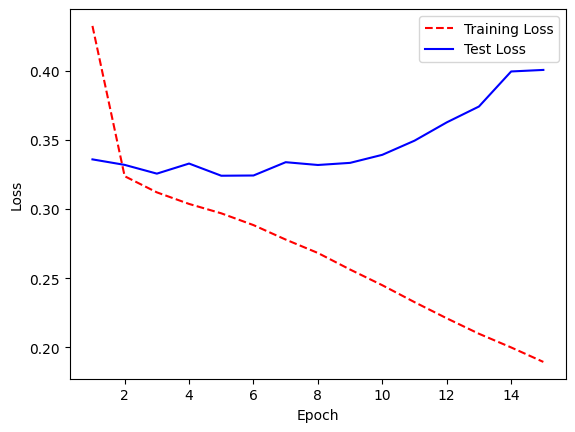

In [35]:
import matplotlib.pyplot as plt

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend( ["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

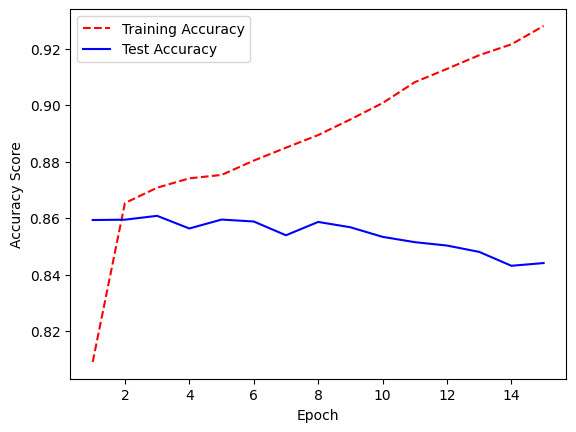

In [36]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

plt. legend( ["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel ("Accuracy Score")
plt.show()

## **조기 종료로 과대적합 줄이기**
- 과대적합을 줄이기 위해 테스트 손실이 더 이상 감소하지 않을 때 훈련을 멈추게 할 수 있음
- 이러한 방법을 조기 종료라고 하며 콜백 함수를 지정하여 조기 종료를 적용할 수 있음

In [37]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor = "val_loss", patience = 2),
             ModelCheckpoint(filepath = "best_model.h5",
                              monitor = "val_loss",
                              save_best_only = True)]

history = model. fit(features_train,
                     target_train,
                     epochs = 20,
                     callbacks = callbacks,
                     verbose = 0,
                     batch_size = 100,
                     validation_data = (features_test, target_test))

- ModelCheckpoint를 사용하여 에폭이 끝날 때마다 모델을 저장할 수 있음

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = [ModelCheckpoint(
        filepath="models_{epoch:02d}_{val_loss:.2f}.keras",
        save_best_only=False
    )
]

# checkpoint = [ModelCheckpoint(filepath = "models_{epoch:02d}_{val_loss:.2f}.hdf5")]

history = model.fit(
    features_train,
    target_train,
    epochs=3,
    callbacks=checkpoint,
    verbose=0,
    batch_size=100,
    validation_data=(features_test, target_test)
)

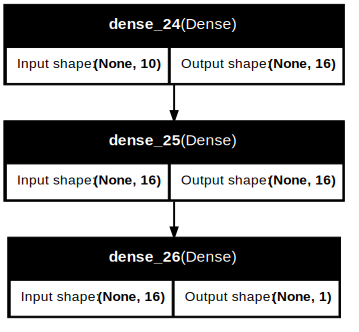

In [39]:
from keras. models import Sequential
from keras. layers import Dense
from keras.utils import model_to_dot
from IPython.display import SVG

model = Sequential ()
model.add(Dense(units = 16, activation = "relu", input_shape = (10,)))
model.add(Dense(units = 16, activation = "relu") )
model.add(Dense(units = 1, activation = "sigmoid"))

SVG(model_to_dot(model, show_shapes = True, dpi = 70).create(prog = "dot", format = "svg"))

### **연습 문제**
- imdb의 영화 리뷰 데이터를 사용하여 영화 리뷰 텍스트가 긍정적인지 부정적인지에 대해
- 분류를 수행하는 인공신경망 모델을 다양한 방법으로 훈련하고
- 가장 성능이 좋다고 판단되는 신경망 모델을 시각화하시오.

In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

model = Sequential()
model.add(Dense(units=16, activation="relu", input_shape=(number_of_features, )))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor = "val_loss", patience = 2),
             ModelCheckpoint (filepath = "best_model.h5",
                              monitor = "val_loss",
                              save_best_only = True)]

history = model. fit(features_train,
                     target_train,
                     epochs = 20,
                     callbacks = callbacks,
                     verbose = 0,
                     batch_size = 100,
                     validation_data = (features_test, target_test))

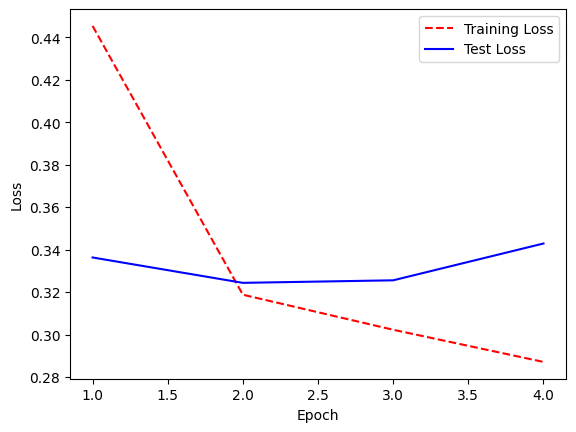

In [3]:
import matplotlib.pyplot as plt

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend( ["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

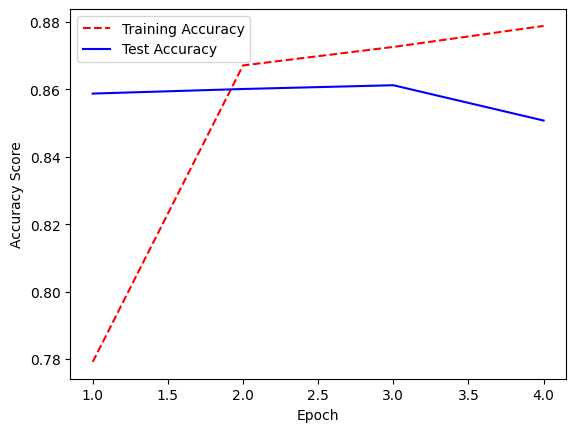

In [4]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

plt. legend( ["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel ("Accuracy Score")
plt.show()

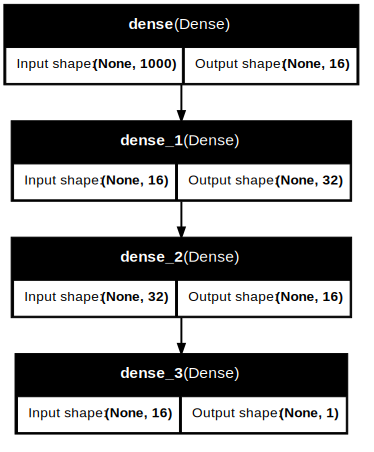

In [5]:
from keras.models import load_model
from keras.utils import model_to_dot
from IPython.display import SVG

best_model = load_model("best_model.h5")

SVG(model_to_dot(best_model, show_shapes=True, dpi=70).create(prog="dot", format="svg"))


- 다양한 모델 비교 실험까지 추가한 전체 코드
- BoW(binary) 기반 데이터 전처리
- 4가지 모델 실험
  - 기본 MLP
  - 깊은 MLP
  - 작은 MLP
  - Dropout 포함 MLP

- EarlyStopping + ModelCheckpoint
- 각 모델 학습곡선 시각화
- 최종 성능 비교 테이블 출력
- 최고 성능 모델 구조 시각화


==== 학습 시작: Basic MLP ====



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


최종 Test Accuracy: 0.8606

==== 학습 시작: Deep MLP ====



최종 Test Accuracy: 0.8596

==== 학습 시작: Small MLP ====



최종 Test Accuracy: 0.8614

==== 학습 시작: Dropout MLP ====



최종 Test Accuracy: 0.8594

===== 모델 성능 비교 =====
Basic MLP: 0.8606
Deep MLP: 0.8596
Small MLP: 0.8614
Dropout MLP: 0.8594

🔥 최고 성능 모델: Small MLP (Acc=0.8614)


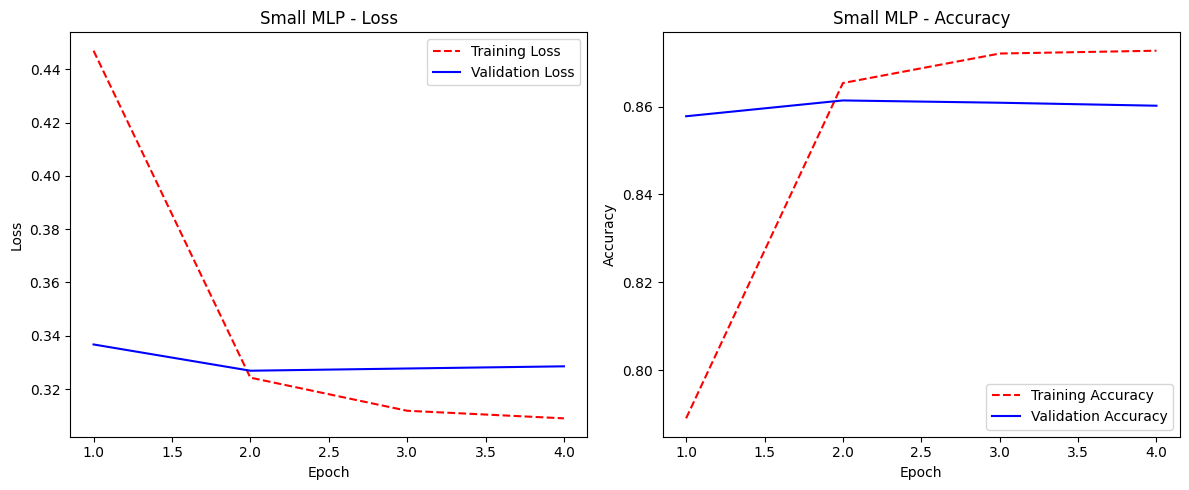

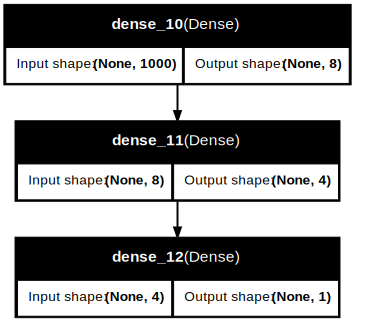

In [6]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import model_to_dot
from IPython.display import SVG

np.random.seed(0)

# -----------------------------
# 1. 데이터 로드 및 전처리
# -----------------------------

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# -----------------------------
# 2. 모델 생성 함수
# -----------------------------

def create_model(model_type="basic"):
    model = Sequential()
    if model_type == "basic":
        model.add(Dense(16, activation="relu", input_shape=(number_of_features,)))
        model.add(Dense(1, activation="sigmoid"))

    elif model_type == "deep":
        model.add(Dense(16, activation="relu", input_shape=(number_of_features,)))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(16, activation="relu"))
        model.add(Dense(1, activation="sigmoid"))

    elif model_type == "small":
        model.add(Dense(8, activation="relu", input_shape=(number_of_features,)))
        model.add(Dense(4, activation="relu"))
        model.add(Dense(1, activation="sigmoid"))

    elif model_type == "dropout":
        model.add(Dense(32, activation="relu", input_shape=(number_of_features,)))
        model.add(Dropout(0.5))
        model.add(Dense(16, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# -----------------------------
# 3. 모델 목록 정의
# -----------------------------
model_types = ["basic", "deep", "small", "dropout"]
model_names = {
    "basic": "Basic MLP",
    "deep": "Deep MLP",
    "small": "Small MLP",
    "dropout": "Dropout MLP"
}

results = {}

# -----------------------------
# 4. 모델별 학습 실행
# -----------------------------

for mtype in model_types:
    print(f"\n==== 학습 시작: {model_names[mtype]} ====\n")

    model = create_model(mtype)

    callbacks = [
        EarlyStopping(monitor="val_loss", patience=2),
        ModelCheckpoint(filepath=f"best_{mtype}.h5", monitor="val_loss", save_best_only=True)
    ]

    history = model.fit(
        features_train, target_train,
        epochs=15,
        batch_size=100,
        validation_data=(features_test, target_test),
        callbacks=callbacks,
        verbose=0
    )

    # 성능 저장
    best_model = load_model(f"best_{mtype}.h5")
    loss, acc = best_model.evaluate(features_test, target_test, verbose=0)
    results[mtype] = {"accuracy": acc, "history": history}

    print(f"최종 Test Accuracy: {acc:.4f}")

# -----------------------------
# 5. 모델별 성능 비교 출력
# -----------------------------
print("\n===== 모델 성능 비교 =====")
for mtype in model_types:
    print(f"{model_names[mtype]}: {results[mtype]['accuracy']:.4f}")

# 최고 성능 모델 선택
best_type = max(results, key=lambda x: results[x]["accuracy"])
print(f"\n🔥 최고 성능 모델: {model_names[best_type]} (Acc={results[best_type]['accuracy']:.4f})")

# -----------------------------
# 6. 최고 모델 학습 그래프 시각화
# -----------------------------
history = results[best_type]["history"]
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
training_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

epoch_count = range(1, len(training_loss) + 1)

plt.figure(figsize=(12,5))

# Loss 그래프
plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.title(f"{model_names[best_type]} - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])

# Accuracy 그래프
plt.subplot(1,2,2)
plt.plot(epoch_count, training_acc, "r--")
plt.plot(epoch_count, test_acc, "b-")
plt.title(f"{model_names[best_type]} - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])

plt.tight_layout()
plt.show()

# -----------------------------
# 7. 최고 모델 구조 시각화
# -----------------------------
best_model = load_model(f"best_{best_type}.h5")

SVG(model_to_dot(best_model, show_shapes=True, dpi=70).create(prog="dot", format="svg"))
